In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [2]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>DESIRED_ACCURACY:
            print("Reached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

--2020-12-27 21:17:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.184.144, 172.217.17.176, 2a00:1450:4017:803::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.184.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2,5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2,55M  3,08MB/s    in 0,8s    

2020-12-27 21:17:57 (3,08 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [8]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),      
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4624)             

In [9]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    ("/tmp/h-or-s"),
    batch_size = 8,
    target_size = (150,150),
    class_mode = 'binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


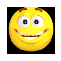

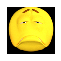

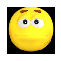

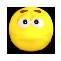

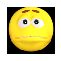

In [38]:
import matplotlib.pyplot as plt
fig.set_size_inches(10, 10)
fig = plt.gcf()
for i in range(0,5):
    sp = plt.subplot(4,4, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)

    plt.imshow(train_generator[i][0][0])
    plt.show()

In [10]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
    train_generator, 
    steps_per_epoch=8,
    epochs = 20,
    verbose = 1,
    callbacks = [callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
8/8 [==============================] - 1s 25ms/step - loss: 1.2880 - acc: 0.5087
Epoch 2/20
8/8 [==============================] - 0s 26ms/step - loss: 0.6985 - acc: 0.6333
Epoch 3/20
8/8 [==============================] - 0s 25ms/step - loss: 0.6058 - acc: 0.6057
Epoch 4/20
8/8 [==============================] - 0s 28ms/step - loss: 0.4543 - acc: 0.7710
Epoch 5/20
8/8 [==============================] - 0s 25ms/step - loss: 0.2530 - acc: 0.8727
Epoch 6/20
8/8 [==============================] - 0s 26ms/step - loss: 0.2202 - acc: 0.9100
Epoch 7/20
8/8 [==============================] - 0s 27ms/step - loss: 0.1183 - acc: 0.9548
Epoch 8/20
8/8 [==============================] - 0s 27ms/step - loss: 0.4956 - acc: 0.8479
Epoch 9/20
8/8 [==============================] - 0s 26ms/step - loss: 0.0385 - acc: 0.9868
Epoch 10/20
8/8 [==============================] - 0s 26ms/step - loss: 0.0507 - acc: 0.9965
Epoch 11/20
8/8 [==============================] - 0s 31ms/step - loss: 0.2512 

In [39]:
import numpy as np
from keras.preprocessing import image
from PIL import Image 
import easygui

path = easygui.fileopenbox()

img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("this is happy")
else:
    print("this is sad")

[1.]
this is happy


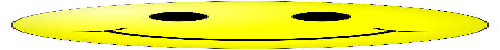

In [42]:
image.load_img(path, target_size=(50, 500))


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)